In [36]:
'''
读取江淮汽车2022年年报PDF文件,进行词频统计，通过词频统计画词云和柱形图
'''
import wordcloud
import matplotlib.pyplot as plt
import pdfplumber
import jieba
import string

In [19]:
pdf = pdfplumber.open('江淮汽车2022年年度报告.pdf')
pages = pdf.pages
text_all = []
for page in pages:
    text = page.extract_text()
    text_all.append(text)
paper = ''.join(text_all)
pdf.close()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2022年年度报告
公司代码：600418 公司简称：江淮汽车
安徽江淮汽车集团股份有限公司
2022 年年度报告
1 / 2382022年年度报告
重要提示
一、 本公司董事会、监事会及董事、监事、高级管理人员保证年度报告内容的真实性、准确性、
完整性，不存在虚假记载、误导性陈述或重大遗漏，并承担个别和连带的法律责任。
二、 公司全体董事出席董事会会议。
三、 容诚会计师事务所（特殊普通合伙）为本公司出具了标准无保留意见的审计报告。
四、 公司负责人项兴初、主管会计工作负责人李明及会计机构负责人（会计主管人员）张立春声
明：保证年度报告中财务报告的真实、准确、完整。
五、 董事会决议通过的本报告期利润分配预案或公积金转增股本预案
鉴于本年度公司净利润出现亏损，公司本年度不进行利润分配也不进行资本公积金转增股本。
六、 前瞻性陈述的风险声明
√适用 □不适用
本报告中所涉及的经营计划、发展战略等前瞻性描述不构成公司对投资者的实质承诺，敬请
投资者注意投资风险。
七、 是否存在被控股股东及其他关联方非经营性占用资金情况
否
八、 是否存在违反规定决策程序对外提供担保的情况
否
九、 是否存在半数以上董事无法保证公司所披露年度报告的真实

In [60]:
words = jieba.lcut(paper)
counts = {}
# 为每个词计数
for word in words:
    if word not in counts:
        counts[word] = 1
    else:
        counts[word] += 1

chinese_punctuation = '，。！？；：‘’“”（）【】《》〈〉「」『』〔〕—…－·、`√1234567890 □' # 中文标点符号和数字
for punctuation in string.punctuation + chinese_punctuation:
    try:
        del counts[punctuation]  # 删除标点符号
    except:
        continue
del counts['\n']  # 删除换行符

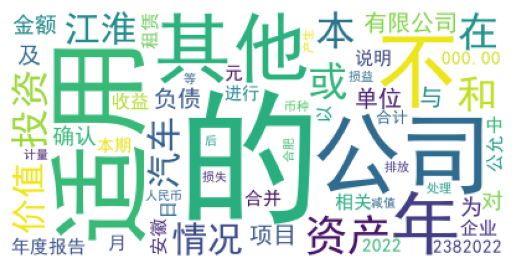

In [61]:
# 绘制词云
wc = wordcloud.WordCloud(
    font_path = 'simhei.ttf',  # 中文字体文件
    repeat=False,  # 词语不重复
    background_color = 'white',  # 背景颜色
    max_words = 100,  # 最大词语数量
    max_font_size = 120,  # 最大字体
    min_font_size = 10,  # 最小字体
)
wc.generate_from_frequencies(counts)
plt.imshow(wc)
plt.axis('off')  # 取消坐标轴
plt.show()

('的', 3086)
('适用', 1334)
('公司', 910)
('不', 792)
('其他', 694)
('年', 652)
('资产', 479)
('在', 435)
('本', 434)
('和', 433)


<function matplotlib.pyplot.show(close=None, block=None)>

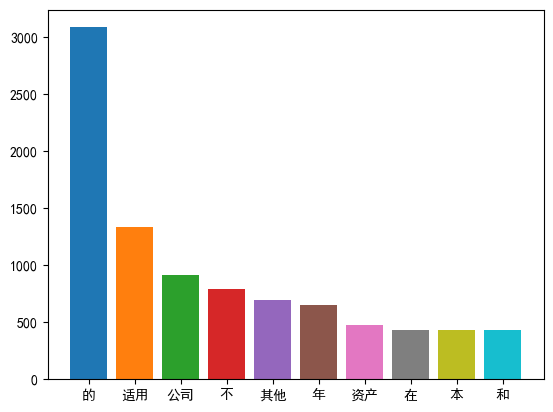

In [62]:
plt.rcParams['font.sans-serif'] = 'SimHei'  # 中文字体
items = list(counts.items())
items.sort(key=lambda x:x[1], reverse=True)  # 从大到小排序
for item in items[:10]:
    word = item[0]
    number = item[1]
    plt.bar(word, number)
plt.show